## Multiclass Classification of Reuters newswires dataset

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded.

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
train_data[0][:10]  # lists of newswires; each newswire is a list of word indices (encoding a sequence of words).

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [7]:
train_labels[0]  #list of 46 different classes

3

In [5]:
#decoding newswires back to text
word_index = reuters.get_word_index()  #word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  #Reverses it, mapping integer indices to words
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #Decodes the newswire. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

550378/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

In [9]:
import numpy as np

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
          results[i, j] = 1.
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [12]:
# can be done exactly like the vector sequences function or we can use a function in keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building the model

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),   #A 16-dimensional space may be too limited to learn to separate 46 different classes
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i
])

In [14]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy", #measures the distance between two probability distributions: between the probability distribution output by the model and the true distribution of the labels
    metrics=["accuracy"])

In [15]:
# Validating your approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Training the model

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 38ms/step - loss: 2.6659 - accuracy: 0.4843 - val_loss: 1.8307 - val_accuracy: 0.6100
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5814 - accuracy: 0.6635 - val_loss: 1.4441 - val_accuracy: 0.6700
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.2528 - accuracy: 0.7189 - val_loss: 1.2445 - val_accuracy: 0.7130
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0324 - accuracy: 0.7665 - val_loss: 1.1143 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8587 - accuracy: 0.8147 - val_loss: 1.0341 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7167 - accuracy: 0.8489 - val_loss: 0.9664 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5959 - accuracy: 0.8728 - val_loss: 0.9243 - val_accuracy: 0.8000
Epoch 8/20
16

### Plotting the training and validation loss & Accuracy

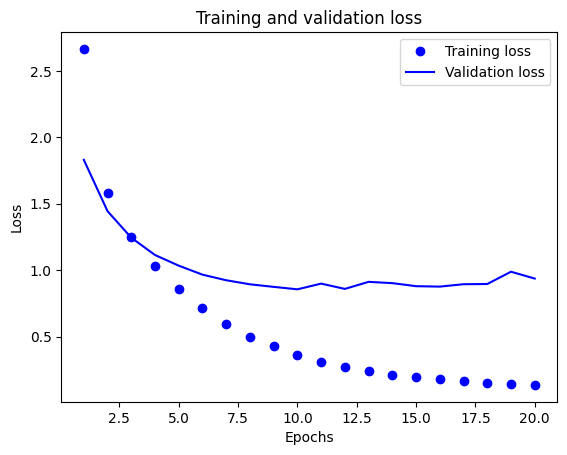

In [18]:
import matplotlib.pyplot as plt

#  Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")   # "bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line."
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


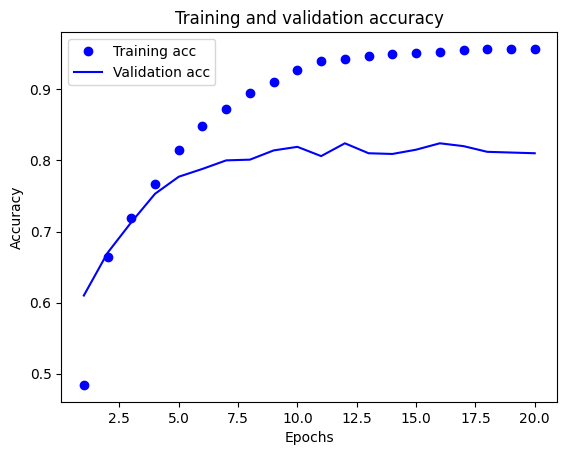

In [19]:
#  Plotting the training and validation accuracy

plt.clf()  # clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set

### Optimizing the Model

In [20]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [21]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [22]:
model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 3s 21ms/step - loss: 2.7317 - accuracy: 0.5116
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.5091 - accuracy: 0.6953
Epoch 3/9
18/18 [==============================] - 0s 20ms/step - loss: 1.1206 - accuracy: 0.7625
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9015 - accuracy: 0.8095
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7354 - accuracy: 0.8447
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6071 - accuracy: 0.8755
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5044 - accuracy: 0.8958
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4215 - accuracy: 0.9130
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9480 - accuracy: 0.7881


In [23]:
results

[0.9480260014533997, 0.7880676984786987]

In [24]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [25]:
predictions[0].shape  #Each entry in “predictions” is a vector of length 46

(46,)

In [26]:
 np.sum(predictions[0])  #The coefficients in this vector sum to 1, as they form a probability distribution

0.99999994

In [27]:
np.argmax(predictions[0])  #The largest entry is the predicted class—the class with the highest probability

3

In [28]:
predictions[0]

array([1.0404580e-05, 1.9897063e-05, 7.7840468e-06, 9.1465324e-01,
       8.3787426e-02, 9.2449886e-07, 5.5904029e-06, 7.4555686e-07,
       4.1924068e-04, 2.8616610e-06, 3.2529699e-06, 5.6613117e-05,
       5.4609609e-05, 7.6423661e-05, 5.9135350e-06, 5.8376431e-06,
       1.2497464e-04, 1.5383910e-05, 2.4353434e-05, 8.7184468e-05,
       1.4279767e-04, 7.1495488e-05, 9.9507884e-07, 3.5931218e-06,
       6.1454739e-06, 1.2370955e-05, 6.3631865e-07, 6.6835596e-06,
       1.5929577e-06, 6.6998102e-05, 7.1744785e-07, 5.0333016e-05,
       2.9890471e-06, 6.3768425e-07, 4.3796816e-05, 3.0609968e-07,
       2.1899985e-05, 4.1746840e-05, 1.8963569e-06, 1.4534731e-04,
       4.6469099e-06, 4.0503251e-06, 1.8419130e-06, 2.3009009e-06,
       1.1013941e-06, 3.5433663e-07], dtype=float32)